# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/cifar/cifar-10-python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

/Users/volterr/anaconda/envs/dlnd/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 2:
Samples: 10000
Label Counts: {0: 984, 1: 1007, 2: 1010, 3: 995, 4: 1010, 5: 988, 6: 1008, 7: 1026, 8: 987, 9: 985}
First 20 Labels: [1, 6, 6, 8, 8, 3, 4, 6, 0, 6, 0, 3, 6, 6, 5, 4, 8, 3, 2, 6]

Example of Image 50:
Image - Min Value: 23 Max Value: 244
Image - Shape: (32, 32, 3)
Label - Label Id: 0 Name: airplane


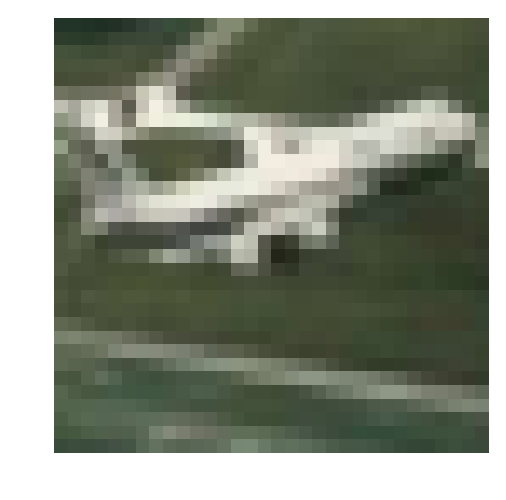

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 2
sample_id = 50
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [3]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    nx = x
    nx = nx / np.max(nx)
    
    return nx


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [4]:
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()
lb.fit(range(10))

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    oh = lb.transform(x)

    return oh

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [7]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    x = tf.placeholder("float", [None, *image_shape], name='x')
    return x


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    y = tf.placeholder("float", [None, n_classes], name='y')
    return y


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    keep_prob = tf.placeholder("float", name='keep_prob')
    return keep_prob


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [8]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
#     print(conv_num_outputs)
#     print(conv_ksize)
#     print(conv_strides)
#     print(x_tensor.shape)
#     print(pool_ksize, pool_strides)
    
    input_depth = int(x_tensor.shape[-1])
    
#     print((*conv_ksize, input_depth, conv_num_outputs))
    
    # Filter (weights and bias)
    W = tf.Variable(tf.truncated_normal((*conv_ksize, input_depth, conv_num_outputs)))
    b = tf.Variable(tf.zeros(conv_num_outputs))
    
    padding = 'SAME'
    strides = [1, *conv_strides, 1]
    
    conv = tf.nn.conv2d(x_tensor, W, strides, padding) + b
    
    relu = tf.nn.relu(conv)
    
    ksize = [1, *pool_ksize, 1]
    strides = [1, *pool_strides, 1]
    padding = 'SAME'
    pool = tf.nn.max_pool(relu, ksize, strides, padding)
    
    return pool 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [9]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    flat = tf.layers.flatten(x_tensor)
    return flat


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [10]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    d = tf.layers.dense(x_tensor, num_outputs, activation=tf.nn.relu)
    return d


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [11]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    d = tf.layers.dense(x_tensor, num_outputs)
    return d


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [20]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    l1 = conv2d_maxpool(x, 64, (5,5), (1,1), (2,2), (2,2))  
    l2 = conv2d_maxpool(l1, 96, (3,3), (1,1), (2,2), (2,2))  
    l3 = conv2d_maxpool(l2, 144, (3,3), (1,1), (2,2), (2,2))  

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    l4 = flatten(l3)
    
    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    l5 = tf.nn.dropout(l4, keep_prob)
    l6 = fully_conn(l5, 10)
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    l7 = output(l6, 10)
    
    # TODO: return output
    return l7


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [21]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    session.run(optimizer, feed_dict={x: feature_batch, y: label_batch, keep_prob: keep_probability})


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [22]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    print('Loss:{}\tAccuracy:{}'.format(
        session.run(cost, feed_dict={x: feature_batch, y: label_batch, keep_prob: 1.0}),
        session.run(accuracy, feed_dict={x: valid_features, y: valid_labels, keep_prob: 1.0})
    ))

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [23]:
# TODO: Tune Parameters
epochs = 400
batch_size = 1024
keep_probability = 0.5

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [24]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Loss:530.275390625	Accuracy:0.16212871670722961
Epoch  2, CIFAR-10 Batch 1:  Loss:483.82720947265625	Accuracy:0.1782178282737732


KeyboardInterrupt: 

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [17]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Loss:3.9060583114624023	Accuracy:0.09459459781646729
Epoch  1, CIFAR-10 Batch 2:  Loss:2.9190499782562256	Accuracy:0.12837837636470795
Epoch  1, CIFAR-10 Batch 3:  Loss:2.557819366455078	Accuracy:0.13513512909412384
Epoch  1, CIFAR-10 Batch 4:  Loss:2.524172067642212	Accuracy:0.1317567527294159
Epoch  1, CIFAR-10 Batch 5:  Loss:2.4909474849700928	Accuracy:0.11486486345529556
Epoch  2, CIFAR-10 Batch 1:  Loss:2.5510151386260986	Accuracy:0.09459459781646729
Epoch  2, CIFAR-10 Batch 2:  Loss:2.334548234939575	Accuracy:0.18581080436706543
Epoch  2, CIFAR-10 Batch 3:  Loss:2.3155672550201416	Accuracy:0.17905405163764954
Epoch  2, CIFAR-10 Batch 4:  Loss:2.280526638031006	Accuracy:0.19256757199764252
Epoch  2, CIFAR-10 Batch 5:  Loss:2.308385133743286	Accuracy:0.1621621549129486
Epoch  3, CIFAR-10 Batch 1:  Loss:2.3576900959014893	Accuracy:0.125
Epoch  3, CIFAR-10 Batch 2:  Loss:2.2333295345306396	Accuracy:0.1756756752729416
Epoch  3, CIFAR-10 Batch 3

Epoch 21, CIFAR-10 Batch 3:  Loss:1.8498737812042236	Accuracy:0.3243243098258972
Epoch 21, CIFAR-10 Batch 4:  Loss:1.7845767736434937	Accuracy:0.37837839126586914
Epoch 21, CIFAR-10 Batch 5:  Loss:1.8437602519989014	Accuracy:0.3074324429035187
Epoch 22, CIFAR-10 Batch 1:  Loss:1.853005051612854	Accuracy:0.31081080436706543
Epoch 22, CIFAR-10 Batch 2:  Loss:1.8326808214187622	Accuracy:0.36486485600471497
Epoch 22, CIFAR-10 Batch 3:  Loss:1.8412351608276367	Accuracy:0.33445945382118225
Epoch 22, CIFAR-10 Batch 4:  Loss:1.778817057609558	Accuracy:0.36486485600471497
Epoch 22, CIFAR-10 Batch 5:  Loss:1.834883451461792	Accuracy:0.31081080436706543
Epoch 23, CIFAR-10 Batch 1:  Loss:1.8520824909210205	Accuracy:0.3074324429035187
Epoch 23, CIFAR-10 Batch 2:  Loss:1.8248472213745117	Accuracy:0.34797295928001404
Epoch 23, CIFAR-10 Batch 3:  Loss:1.832423448562622	Accuracy:0.34797295928001404
Epoch 23, CIFAR-10 Batch 4:  Loss:1.77191162109375	Accuracy:0.37162160873413086
Epoch 23, CIFAR-10 Batch 

Epoch 41, CIFAR-10 Batch 5:  Loss:1.732430100440979	Accuracy:0.3513513505458832
Epoch 42, CIFAR-10 Batch 1:  Loss:1.7566169500350952	Accuracy:0.32094594836235046
Epoch 42, CIFAR-10 Batch 2:  Loss:1.7313512563705444	Accuracy:0.37837839126586914
Epoch 42, CIFAR-10 Batch 3:  Loss:1.6782991886138916	Accuracy:0.3952702581882477
Epoch 42, CIFAR-10 Batch 4:  Loss:1.6802737712860107	Accuracy:0.37837839126586914
Epoch 42, CIFAR-10 Batch 5:  Loss:1.7293269634246826	Accuracy:0.3513513505458832
Epoch 43, CIFAR-10 Batch 1:  Loss:1.7567616701126099	Accuracy:0.3243243098258972
Epoch 43, CIFAR-10 Batch 2:  Loss:1.7193701267242432	Accuracy:0.40878379344940186
Epoch 43, CIFAR-10 Batch 3:  Loss:1.665029525756836	Accuracy:0.41554054617881775
Epoch 43, CIFAR-10 Batch 4:  Loss:1.6680035591125488	Accuracy:0.38513514399528503
Epoch 43, CIFAR-10 Batch 5:  Loss:1.7184559106826782	Accuracy:0.36486485600471497
Epoch 44, CIFAR-10 Batch 1:  Loss:1.7459304332733154	Accuracy:0.3378378450870514
Epoch 44, CIFAR-10 Batc

Epoch 62, CIFAR-10 Batch 2:  Loss:1.618239402770996	Accuracy:0.43918919563293457
Epoch 62, CIFAR-10 Batch 3:  Loss:1.5833419561386108	Accuracy:0.42229729890823364
Epoch 62, CIFAR-10 Batch 4:  Loss:1.5968865156173706	Accuracy:0.40878379344940186
Epoch 62, CIFAR-10 Batch 5:  Loss:1.6285295486450195	Accuracy:0.40878379344940186
Epoch 63, CIFAR-10 Batch 1:  Loss:1.6909259557724	Accuracy:0.3885135054588318
Epoch 63, CIFAR-10 Batch 2:  Loss:1.6105678081512451	Accuracy:0.4628378450870514
Epoch 63, CIFAR-10 Batch 3:  Loss:1.5774660110473633	Accuracy:0.4256756901741028
Epoch 63, CIFAR-10 Batch 4:  Loss:1.596689224243164	Accuracy:0.4054054021835327
Epoch 63, CIFAR-10 Batch 5:  Loss:1.6224238872528076	Accuracy:0.42905405163764954
Epoch 64, CIFAR-10 Batch 1:  Loss:1.6814184188842773	Accuracy:0.3817567527294159
Epoch 64, CIFAR-10 Batch 2:  Loss:1.6112544536590576	Accuracy:0.4493243098258972
Epoch 64, CIFAR-10 Batch 3:  Loss:1.5792473554611206	Accuracy:0.4256756901741028
Epoch 64, CIFAR-10 Batch 4: 

Epoch 82, CIFAR-10 Batch 4:  Loss:1.5500383377075195	Accuracy:0.4560810923576355
Epoch 82, CIFAR-10 Batch 5:  Loss:1.5888980627059937	Accuracy:0.45945945382118225
Epoch 83, CIFAR-10 Batch 1:  Loss:1.64512038230896	Accuracy:0.3885135054588318
Epoch 83, CIFAR-10 Batch 2:  Loss:1.5646487474441528	Accuracy:0.46621620655059814
Epoch 83, CIFAR-10 Batch 3:  Loss:1.52033531665802	Accuracy:0.4797297418117523
Epoch 83, CIFAR-10 Batch 4:  Loss:1.552830696105957	Accuracy:0.4628378450870514
Epoch 83, CIFAR-10 Batch 5:  Loss:1.5887948274612427	Accuracy:0.42905405163764954
Epoch 84, CIFAR-10 Batch 1:  Loss:1.6405061483383179	Accuracy:0.3986486494541168
Epoch 84, CIFAR-10 Batch 2:  Loss:1.5658385753631592	Accuracy:0.45270270109176636
Epoch 84, CIFAR-10 Batch 3:  Loss:1.5101200342178345	Accuracy:0.46621620655059814
Epoch 84, CIFAR-10 Batch 4:  Loss:1.5488427877426147	Accuracy:0.4425675570964813
Epoch 84, CIFAR-10 Batch 5:  Loss:1.5835857391357422	Accuracy:0.45270270109176636
Epoch 85, CIFAR-10 Batch 1:

Epoch 102, CIFAR-10 Batch 5:  Loss:1.554417371749878	Accuracy:0.4763513505458832
Epoch 103, CIFAR-10 Batch 1:  Loss:1.5964545011520386	Accuracy:0.41554054617881775
Epoch 103, CIFAR-10 Batch 2:  Loss:1.5133048295974731	Accuracy:0.48986485600471497
Epoch 103, CIFAR-10 Batch 3:  Loss:1.4567714929580688	Accuracy:0.5236486196517944
Epoch 103, CIFAR-10 Batch 4:  Loss:1.509166955947876	Accuracy:0.45270270109176636
Epoch 103, CIFAR-10 Batch 5:  Loss:1.5498707294464111	Accuracy:0.4560810923576355
Epoch 104, CIFAR-10 Batch 1:  Loss:1.5960919857025146	Accuracy:0.40202704071998596
Epoch 104, CIFAR-10 Batch 2:  Loss:1.50892174243927	Accuracy:0.45270270109176636
Epoch 104, CIFAR-10 Batch 3:  Loss:1.451708197593689	Accuracy:0.5405405163764954
Epoch 104, CIFAR-10 Batch 4:  Loss:1.5084049701690674	Accuracy:0.4324324429035187
Epoch 104, CIFAR-10 Batch 5:  Loss:1.5407534837722778	Accuracy:0.46621620655059814
Epoch 105, CIFAR-10 Batch 1:  Loss:1.5891895294189453	Accuracy:0.3986486494541168
Epoch 105, CIFA

Epoch 122, CIFAR-10 Batch 5:  Loss:1.5081126689910889	Accuracy:0.47297295928001404
Epoch 123, CIFAR-10 Batch 1:  Loss:1.569635033607483	Accuracy:0.4256756901741028
Epoch 123, CIFAR-10 Batch 2:  Loss:1.4643645286560059	Accuracy:0.4797297418117523
Epoch 123, CIFAR-10 Batch 3:  Loss:1.4117790460586548	Accuracy:0.5439189076423645
Epoch 123, CIFAR-10 Batch 4:  Loss:1.4721391201019287	Accuracy:0.4493243098258972
Epoch 123, CIFAR-10 Batch 5:  Loss:1.508327603340149	Accuracy:0.4628378450870514
Epoch 124, CIFAR-10 Batch 1:  Loss:1.5691790580749512	Accuracy:0.40878379344940186
Epoch 124, CIFAR-10 Batch 2:  Loss:1.4653699398040771	Accuracy:0.4763513505458832
Epoch 124, CIFAR-10 Batch 3:  Loss:1.4069195985794067	Accuracy:0.5472972989082336
Epoch 124, CIFAR-10 Batch 4:  Loss:1.4744211435317993	Accuracy:0.45270270109176636
Epoch 124, CIFAR-10 Batch 5:  Loss:1.506475806236267	Accuracy:0.4695945978164673
Epoch 125, CIFAR-10 Batch 1:  Loss:1.5655444860458374	Accuracy:0.40202704071998596
Epoch 125, CIFA

Epoch 142, CIFAR-10 Batch 5:  Loss:1.489900827407837	Accuracy:0.47297295928001404
Epoch 143, CIFAR-10 Batch 1:  Loss:1.5485122203826904	Accuracy:0.41554054617881775
Epoch 143, CIFAR-10 Batch 2:  Loss:1.4444847106933594	Accuracy:0.48986485600471497
Epoch 143, CIFAR-10 Batch 3:  Loss:1.3934508562088013	Accuracy:0.5506756901741028
Epoch 143, CIFAR-10 Batch 4:  Loss:1.4568184614181519	Accuracy:0.4493243098258972
Epoch 143, CIFAR-10 Batch 5:  Loss:1.4920520782470703	Accuracy:0.4797297418117523
Epoch 144, CIFAR-10 Batch 1:  Loss:1.550963282585144	Accuracy:0.4189189076423645
Epoch 144, CIFAR-10 Batch 2:  Loss:1.4494068622589111	Accuracy:0.4763513505458832
Epoch 144, CIFAR-10 Batch 3:  Loss:1.4006532430648804	Accuracy:0.5540540814399719
Epoch 144, CIFAR-10 Batch 4:  Loss:1.449338674545288	Accuracy:0.4493243098258972
Epoch 144, CIFAR-10 Batch 5:  Loss:1.4881113767623901	Accuracy:0.4695945978164673
Epoch 145, CIFAR-10 Batch 1:  Loss:1.5536748170852661	Accuracy:0.40202704071998596
Epoch 145, CIFA

Epoch 163, CIFAR-10 Batch 1:  Loss:1.5453284978866577	Accuracy:0.4189189076423645
Epoch 163, CIFAR-10 Batch 2:  Loss:1.4250049591064453	Accuracy:0.4831081032752991
Epoch 163, CIFAR-10 Batch 3:  Loss:1.3734755516052246	Accuracy:0.5540540814399719
Epoch 163, CIFAR-10 Batch 4:  Loss:1.4259052276611328	Accuracy:0.4628378450870514
Epoch 163, CIFAR-10 Batch 5:  Loss:1.468824863433838	Accuracy:0.47297295928001404
Epoch 164, CIFAR-10 Batch 1:  Loss:1.544811725616455	Accuracy:0.40878379344940186
Epoch 164, CIFAR-10 Batch 2:  Loss:1.421827793121338	Accuracy:0.4932432472705841
Epoch 164, CIFAR-10 Batch 3:  Loss:1.3631104230880737	Accuracy:0.5439189076423645
Epoch 164, CIFAR-10 Batch 4:  Loss:1.4268690347671509	Accuracy:0.4493243098258972
Epoch 164, CIFAR-10 Batch 5:  Loss:1.4631831645965576	Accuracy:0.49662160873413086
Epoch 165, CIFAR-10 Batch 1:  Loss:1.5364060401916504	Accuracy:0.41554054617881775
Epoch 165, CIFAR-10 Batch 2:  Loss:1.421237587928772	Accuracy:0.4831081032752991
Epoch 165, CIFAR

Epoch 183, CIFAR-10 Batch 2:  Loss:1.4066468477249146	Accuracy:0.5135135054588318
Epoch 183, CIFAR-10 Batch 3:  Loss:1.3556759357452393	Accuracy:0.5574324131011963
Epoch 183, CIFAR-10 Batch 4:  Loss:1.4010623693466187	Accuracy:0.4864864945411682
Epoch 183, CIFAR-10 Batch 5:  Loss:1.4505250453948975	Accuracy:0.5067567825317383
Epoch 184, CIFAR-10 Batch 1:  Loss:1.537545084953308	Accuracy:0.42229729890823364
Epoch 184, CIFAR-10 Batch 2:  Loss:1.4013419151306152	Accuracy:0.5236486196517944
Epoch 184, CIFAR-10 Batch 3:  Loss:1.3553311824798584	Accuracy:0.5540540814399719
Epoch 184, CIFAR-10 Batch 4:  Loss:1.3989241123199463	Accuracy:0.4864864945411682
Epoch 184, CIFAR-10 Batch 5:  Loss:1.4421249628067017	Accuracy:0.5168918967247009
Epoch 185, CIFAR-10 Batch 1:  Loss:1.5350044965744019	Accuracy:0.4189189076423645
Epoch 185, CIFAR-10 Batch 2:  Loss:1.4041078090667725	Accuracy:0.5168918967247009
Epoch 185, CIFAR-10 Batch 3:  Loss:1.3555707931518555	Accuracy:0.5608108043670654
Epoch 185, CIFAR

Epoch 203, CIFAR-10 Batch 3:  Loss:1.3512061834335327	Accuracy:0.5405405163764954
Epoch 203, CIFAR-10 Batch 4:  Loss:1.3766392469406128	Accuracy:0.4797297418117523
Epoch 203, CIFAR-10 Batch 5:  Loss:1.4366307258605957	Accuracy:0.5
Epoch 204, CIFAR-10 Batch 1:  Loss:1.5236103534698486	Accuracy:0.42229729890823364
Epoch 204, CIFAR-10 Batch 2:  Loss:1.3857837915420532	Accuracy:0.5236486196517944
Epoch 204, CIFAR-10 Batch 3:  Loss:1.3523610830307007	Accuracy:0.5472972989082336
Epoch 204, CIFAR-10 Batch 4:  Loss:1.3819185495376587	Accuracy:0.4932432472705841
Epoch 204, CIFAR-10 Batch 5:  Loss:1.4421671628952026	Accuracy:0.4932432472705841
Epoch 205, CIFAR-10 Batch 1:  Loss:1.522011399269104	Accuracy:0.4189189076423645
Epoch 205, CIFAR-10 Batch 2:  Loss:1.3860329389572144	Accuracy:0.537162184715271
Epoch 205, CIFAR-10 Batch 3:  Loss:1.3469127416610718	Accuracy:0.5506756901741028
Epoch 205, CIFAR-10 Batch 4:  Loss:1.3744615316390991	Accuracy:0.48986485600471497
Epoch 205, CIFAR-10 Batch 5:  L

Epoch 223, CIFAR-10 Batch 5:  Loss:1.4302524328231812	Accuracy:0.46621620655059814
Epoch 224, CIFAR-10 Batch 1:  Loss:1.514156699180603	Accuracy:0.4189189076423645
Epoch 224, CIFAR-10 Batch 2:  Loss:1.3759710788726807	Accuracy:0.5608108043670654
Epoch 224, CIFAR-10 Batch 3:  Loss:1.3519395589828491	Accuracy:0.5202702879905701
Epoch 224, CIFAR-10 Batch 4:  Loss:1.3662046194076538	Accuracy:0.4932432472705841
Epoch 224, CIFAR-10 Batch 5:  Loss:1.4313546419143677	Accuracy:0.5
Epoch 225, CIFAR-10 Batch 1:  Loss:1.513405680656433	Accuracy:0.4256756901741028
Epoch 225, CIFAR-10 Batch 2:  Loss:1.3786847591400146	Accuracy:0.5472972989082336
Epoch 225, CIFAR-10 Batch 3:  Loss:1.3482221364974976	Accuracy:0.5337837934494019
Epoch 225, CIFAR-10 Batch 4:  Loss:1.362591028213501	Accuracy:0.5135135054588318
Epoch 225, CIFAR-10 Batch 5:  Loss:1.4317042827606201	Accuracy:0.5033783912658691
Epoch 226, CIFAR-10 Batch 1:  Loss:1.5172054767608643	Accuracy:0.42905405163764954
Epoch 226, CIFAR-10 Batch 2:  Lo

Epoch 244, CIFAR-10 Batch 1:  Loss:1.5040370225906372	Accuracy:0.42905405163764954
Epoch 244, CIFAR-10 Batch 2:  Loss:1.36448335647583	Accuracy:0.5675675868988037
Epoch 244, CIFAR-10 Batch 3:  Loss:1.334654688835144	Accuracy:0.5405405163764954
Epoch 244, CIFAR-10 Batch 4:  Loss:1.3460019826889038	Accuracy:0.4864864945411682
Epoch 244, CIFAR-10 Batch 5:  Loss:1.4147377014160156	Accuracy:0.5101351141929626
Epoch 245, CIFAR-10 Batch 1:  Loss:1.5067594051361084	Accuracy:0.43581080436706543
Epoch 245, CIFAR-10 Batch 2:  Loss:1.3614318370819092	Accuracy:0.5574324131011963
Epoch 245, CIFAR-10 Batch 3:  Loss:1.342429757118225	Accuracy:0.5337837934494019
Epoch 245, CIFAR-10 Batch 4:  Loss:1.346238374710083	Accuracy:0.49662160873413086
Epoch 245, CIFAR-10 Batch 5:  Loss:1.4167544841766357	Accuracy:0.4932432472705841
Epoch 246, CIFAR-10 Batch 1:  Loss:1.5058923959732056	Accuracy:0.42229729890823364
Epoch 246, CIFAR-10 Batch 2:  Loss:1.3606376647949219	Accuracy:0.5574324131011963
Epoch 246, CIFAR-

Epoch 264, CIFAR-10 Batch 3:  Loss:1.330405831336975	Accuracy:0.5439189076423645
Epoch 264, CIFAR-10 Batch 4:  Loss:1.3265334367752075	Accuracy:0.5101351141929626
Epoch 264, CIFAR-10 Batch 5:  Loss:1.4068236351013184	Accuracy:0.49662160873413086
Epoch 265, CIFAR-10 Batch 1:  Loss:1.4906177520751953	Accuracy:0.4121621549129486
Epoch 265, CIFAR-10 Batch 2:  Loss:1.3569949865341187	Accuracy:0.5472972989082336
Epoch 265, CIFAR-10 Batch 3:  Loss:1.3229221105575562	Accuracy:0.537162184715271
Epoch 265, CIFAR-10 Batch 4:  Loss:1.3273371458053589	Accuracy:0.5101351141929626
Epoch 265, CIFAR-10 Batch 5:  Loss:1.4123637676239014	Accuracy:0.4864864945411682
Epoch 266, CIFAR-10 Batch 1:  Loss:1.4962244033813477	Accuracy:0.4425675570964813
Epoch 266, CIFAR-10 Batch 2:  Loss:1.3621339797973633	Accuracy:0.5540540814399719
Epoch 266, CIFAR-10 Batch 3:  Loss:1.3263518810272217	Accuracy:0.5236486196517944
Epoch 266, CIFAR-10 Batch 4:  Loss:1.3332760334014893	Accuracy:0.5033783912658691
Epoch 266, CIFAR-

Epoch 284, CIFAR-10 Batch 4:  Loss:1.3153440952301025	Accuracy:0.5033783912658691
Epoch 284, CIFAR-10 Batch 5:  Loss:1.4067869186401367	Accuracy:0.49662160873413086
Epoch 285, CIFAR-10 Batch 1:  Loss:1.4863295555114746	Accuracy:0.4189189076423645
Epoch 285, CIFAR-10 Batch 2:  Loss:1.3594061136245728	Accuracy:0.5405405163764954
Epoch 285, CIFAR-10 Batch 3:  Loss:1.308803915977478	Accuracy:0.5270270109176636
Epoch 285, CIFAR-10 Batch 4:  Loss:1.3188722133636475	Accuracy:0.4864864945411682
Epoch 285, CIFAR-10 Batch 5:  Loss:1.416610598564148	Accuracy:0.49662160873413086
Epoch 286, CIFAR-10 Batch 1:  Loss:1.4817538261413574	Accuracy:0.4324324429035187
Epoch 286, CIFAR-10 Batch 2:  Loss:1.3570722341537476	Accuracy:0.5472972989082336
Epoch 286, CIFAR-10 Batch 3:  Loss:1.3080685138702393	Accuracy:0.5337837934494019
Epoch 286, CIFAR-10 Batch 4:  Loss:1.3169025182724	Accuracy:0.5
Epoch 286, CIFAR-10 Batch 5:  Loss:1.4030271768569946	Accuracy:0.4932432472705841
Epoch 287, CIFAR-10 Batch 1:  Loss

Epoch 305, CIFAR-10 Batch 1:  Loss:1.486228585243225	Accuracy:0.42905405163764954
Epoch 305, CIFAR-10 Batch 2:  Loss:1.3585811853408813	Accuracy:0.537162184715271
Epoch 305, CIFAR-10 Batch 3:  Loss:1.2939465045928955	Accuracy:0.537162184715271
Epoch 305, CIFAR-10 Batch 4:  Loss:1.3009209632873535	Accuracy:0.5067567825317383
Epoch 305, CIFAR-10 Batch 5:  Loss:1.3941009044647217	Accuracy:0.4932432472705841
Epoch 306, CIFAR-10 Batch 1:  Loss:1.4710851907730103	Accuracy:0.42229729890823364
Epoch 306, CIFAR-10 Batch 2:  Loss:1.3460021018981934	Accuracy:0.537162184715271
Epoch 306, CIFAR-10 Batch 3:  Loss:1.2915726900100708	Accuracy:0.5202702879905701
Epoch 306, CIFAR-10 Batch 4:  Loss:1.300363302230835	Accuracy:0.5236486196517944
Epoch 306, CIFAR-10 Batch 5:  Loss:1.3990190029144287	Accuracy:0.4831081032752991
Epoch 307, CIFAR-10 Batch 1:  Loss:1.4873546361923218	Accuracy:0.4121621549129486
Epoch 307, CIFAR-10 Batch 2:  Loss:1.3530688285827637	Accuracy:0.5304054021835327
Epoch 307, CIFAR-10

Epoch 325, CIFAR-10 Batch 2:  Loss:1.3489421606063843	Accuracy:0.5337837934494019
Epoch 325, CIFAR-10 Batch 3:  Loss:1.276299238204956	Accuracy:0.5405405163764954
Epoch 325, CIFAR-10 Batch 4:  Loss:1.289808988571167	Accuracy:0.5202702879905701
Epoch 325, CIFAR-10 Batch 5:  Loss:1.3942300081253052	Accuracy:0.4831081032752991
Epoch 326, CIFAR-10 Batch 1:  Loss:1.4647796154022217	Accuracy:0.41554054617881775
Epoch 326, CIFAR-10 Batch 2:  Loss:1.3469808101654053	Accuracy:0.5540540814399719
Epoch 326, CIFAR-10 Batch 3:  Loss:1.2732998132705688	Accuracy:0.5574324131011963
Epoch 326, CIFAR-10 Batch 4:  Loss:1.290682077407837	Accuracy:0.5168918967247009
Epoch 326, CIFAR-10 Batch 5:  Loss:1.3962916135787964	Accuracy:0.48986485600471497
Epoch 327, CIFAR-10 Batch 1:  Loss:1.4709538221359253	Accuracy:0.3986486494541168
Epoch 327, CIFAR-10 Batch 2:  Loss:1.3497143983840942	Accuracy:0.537162184715271
Epoch 327, CIFAR-10 Batch 3:  Loss:1.2735224962234497	Accuracy:0.5304054021835327
Epoch 327, CIFAR-1

Epoch 345, CIFAR-10 Batch 4:  Loss:1.2762036323547363	Accuracy:0.5472972989082336
Epoch 345, CIFAR-10 Batch 5:  Loss:1.388575553894043	Accuracy:0.5168918967247009
Epoch 346, CIFAR-10 Batch 1:  Loss:1.4546990394592285	Accuracy:0.42905405163764954
Epoch 346, CIFAR-10 Batch 2:  Loss:1.3449337482452393	Accuracy:0.5506756901741028
Epoch 346, CIFAR-10 Batch 3:  Loss:1.2693936824798584	Accuracy:0.5236486196517944
Epoch 346, CIFAR-10 Batch 4:  Loss:1.2797404527664185	Accuracy:0.537162184715271
Epoch 346, CIFAR-10 Batch 5:  Loss:1.3861877918243408	Accuracy:0.5101351141929626
Epoch 347, CIFAR-10 Batch 1:  Loss:1.4559192657470703	Accuracy:0.4121621549129486
Epoch 347, CIFAR-10 Batch 2:  Loss:1.3450191020965576	Accuracy:0.5472972989082336
Epoch 347, CIFAR-10 Batch 3:  Loss:1.2730213403701782	Accuracy:0.5168918967247009
Epoch 347, CIFAR-10 Batch 4:  Loss:1.278917908668518	Accuracy:0.537162184715271
Epoch 347, CIFAR-10 Batch 5:  Loss:1.385049819946289	Accuracy:0.5168918967247009
Epoch 348, CIFAR-10 

Epoch 365, CIFAR-10 Batch 5:  Loss:1.3722106218338013	Accuracy:0.5135135054588318
Epoch 366, CIFAR-10 Batch 1:  Loss:1.443791389465332	Accuracy:0.42905405163764954
Epoch 366, CIFAR-10 Batch 2:  Loss:1.3441082239151	Accuracy:0.5337837934494019
Epoch 366, CIFAR-10 Batch 3:  Loss:1.2492643594741821	Accuracy:0.5168918967247009
Epoch 366, CIFAR-10 Batch 4:  Loss:1.2765042781829834	Accuracy:0.5405405163764954
Epoch 366, CIFAR-10 Batch 5:  Loss:1.3749576807022095	Accuracy:0.5101351141929626
Epoch 367, CIFAR-10 Batch 1:  Loss:1.4406017065048218	Accuracy:0.41554054617881775
Epoch 367, CIFAR-10 Batch 2:  Loss:1.337497591972351	Accuracy:0.537162184715271
Epoch 367, CIFAR-10 Batch 3:  Loss:1.2530773878097534	Accuracy:0.5101351141929626
Epoch 367, CIFAR-10 Batch 4:  Loss:1.2780946493148804	Accuracy:0.5270270109176636
Epoch 367, CIFAR-10 Batch 5:  Loss:1.3734487295150757	Accuracy:0.48986485600471497
Epoch 368, CIFAR-10 Batch 1:  Loss:1.4455411434173584	Accuracy:0.4256756901741028
Epoch 368, CIFAR-10

Epoch 386, CIFAR-10 Batch 1:  Loss:1.4379764795303345	Accuracy:0.4493243098258972
Epoch 386, CIFAR-10 Batch 2:  Loss:1.3341525793075562	Accuracy:0.537162184715271
Epoch 386, CIFAR-10 Batch 3:  Loss:1.2459746599197388	Accuracy:0.5270270109176636
Epoch 386, CIFAR-10 Batch 4:  Loss:1.2704524993896484	Accuracy:0.5304054021835327
Epoch 386, CIFAR-10 Batch 5:  Loss:1.3687840700149536	Accuracy:0.5168918967247009
Epoch 387, CIFAR-10 Batch 1:  Loss:1.427802562713623	Accuracy:0.42229729890823364
Epoch 387, CIFAR-10 Batch 2:  Loss:1.3417952060699463	Accuracy:0.5540540814399719
Epoch 387, CIFAR-10 Batch 3:  Loss:1.254800796508789	Accuracy:0.5405405163764954
Epoch 387, CIFAR-10 Batch 4:  Loss:1.2669059038162231	Accuracy:0.5472972989082336
Epoch 387, CIFAR-10 Batch 5:  Loss:1.3672047853469849	Accuracy:0.5067567825317383
Epoch 388, CIFAR-10 Batch 1:  Loss:1.4418437480926514	Accuracy:0.42905405163764954
Epoch 388, CIFAR-10 Batch 2:  Loss:1.3409618139266968	Accuracy:0.5304054021835327
Epoch 388, CIFAR-

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.49146943986415864



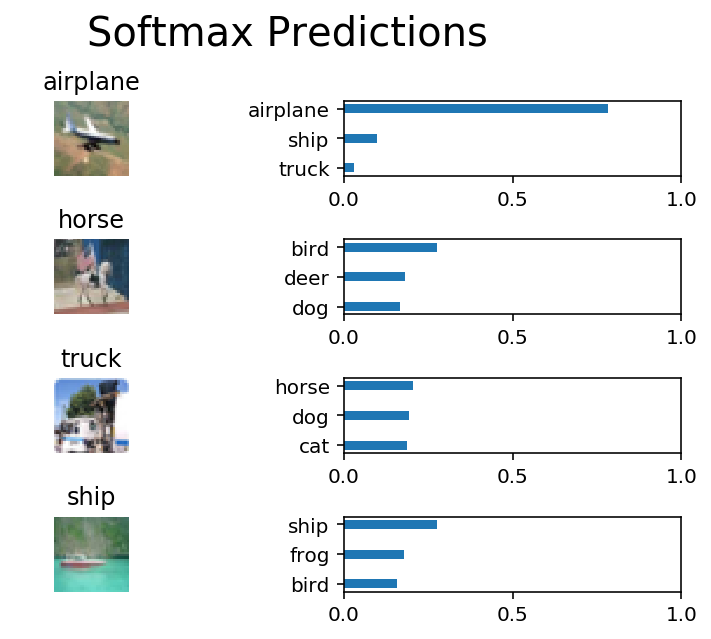

In [18]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.